Ridge - RMSE: 17.61, R²: 0.73
Lasso - RMSE: 18.46, R²: 0.71
XGBoost - RMSE: 10.02, R²: 0.91


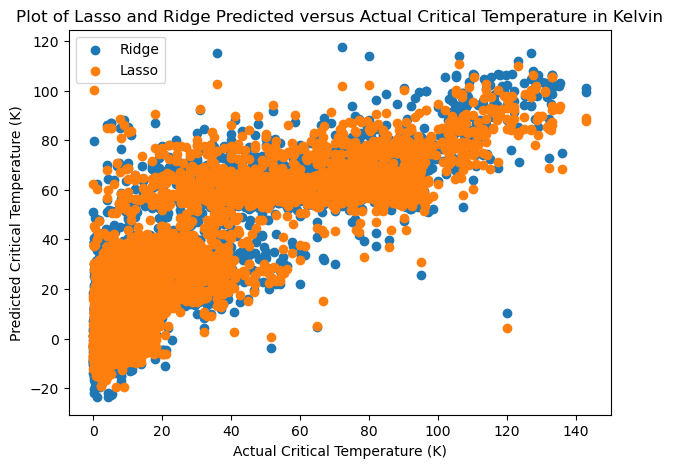

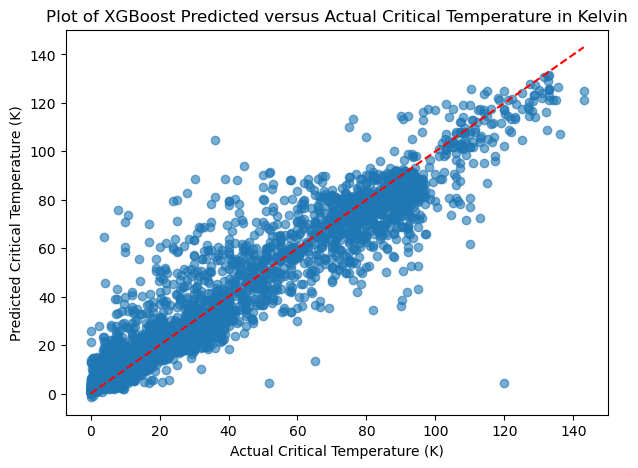

In [1]:
# Packages imported: pandas, numpy, matplotlib, scikit-learn, and xgboost. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# The train.csv was loaded in, 'critical temp' column from train.csv dataset was removed, and split into training and testing sets. 
train = pd.read_csv("train.csv")
X = train.drop(columns = ["critical_temp"])
y = train["critical_temp"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# The scaler was fit on training data and transformed. 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with regularization strength alpha = 1.0, model trained, critical temperature predicted, and cross-validated. 
ridge_regression = Ridge(alpha = 1.0)
ridge_regression.fit(X_train_scaled, y_train)
ridge_y = ridge_regression.predict(X_test_scaled)
ridge_score = cross_val_score(Ridge(alpha = 1.0), X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 5)

# Lasso regressioin with regularization strength alpha = 0.1 and max iterations of 100000. Lasso model was trained and critical temperature was 
# predicted and lastly, cross-validated. 
lasso_regression = Lasso(alpha = 0.1, max_iter = 100000)
lasso_regression.fit(X_train_scaled, y_train)
lasso_y = lasso_regression.predict(X_test_scaled)
lasso_score = cross_val_score(Lasso(alpha = 0.1, max_iter = 100000), X_train_scaled, y_train, scoring = "neg_mean_squared_error", cv = 5)

# evaluate function made to calculate the root mean squared error and R^2 for the predicted critical temperatures from Ridge and Lasso regression. 
# Values are printed. 
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
evaluate(y_test, ridge_y, "Ridge")
evaluate(y_test, lasso_y, "Lasso")

# Figure size used to create separate plots from future plots. Predicted critical temperatures from both Ridge and Lasso regression plotted against
# the actual critical temperatures. 
plt.figure(figsize=(7, 5))
plt.scatter(y_test, ridge_y, label = "Ridge")
plt.scatter(y_test, lasso_y, label = "Lasso")
plt.xlabel("Actual Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")
plt.title("Plot of Lasso and Ridge Predicted versus Actual Critical Temperature in Kelvin")
plt.legend()

# DataFram used to save predicted critical temperatures from Ridge and Lasso regression into csv file. This file is submitted to BruinLearn as well. 
results = pd.DataFrame({"Predicted Critical Temperature from Ridge Regression": ridge_y,
                        "Predicted Critical Temperature from Lasso Regression": lasso_y,
                        "Actual Critical Temperature": y_test.values})
results.to_csv("predicted versus actual data.csv", index = False)

# ChatGPT used to reimplement this analysis from the Hamidieh article. XGBoost model trained and used to predict critical temperature and then
# cross-validated. 
xgb_regression = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_regression.fit(X_train_scaled, y_train)
xgb_y_pred = xgb_regression.predict(X_test_scaled)
xgb_score = cross_val_score(XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1),
                            X_train_scaled, y_train,
                            scoring="neg_mean_squared_error", cv=5)

# New evaluate function to calculate and print the roomt mean squared error and R^2 of predicted critical temperature. 
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")
evaluate(y_test, xgb_y_pred, "XGBoost")

# Predicted critical temperatures from XGBoost plotted against actual critical temperatures. 
plt.figure(figsize=(7, 5))
plt.scatter(y_test, xgb_y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Critical Temperature (K)")
plt.ylabel("Predicted Critical Temperature (K)")
plt.title("Plot of XGBoost Predicted versus Actual Critical Temperature in Kelvin")

# DataFram used to save predicted critical temperatures from XGBoost into csv file. This file is submitted to BruinLearn as well. 
results = pd.DataFrame({"Predicted Critical Temperature from XGBoost": xgb_y_pred,
                        "Actual Critical Temperature": y_test.values})
results.to_csv("xgboost predicted versus actual data.csv", index = False)

Precision for High T_c class: 0.69


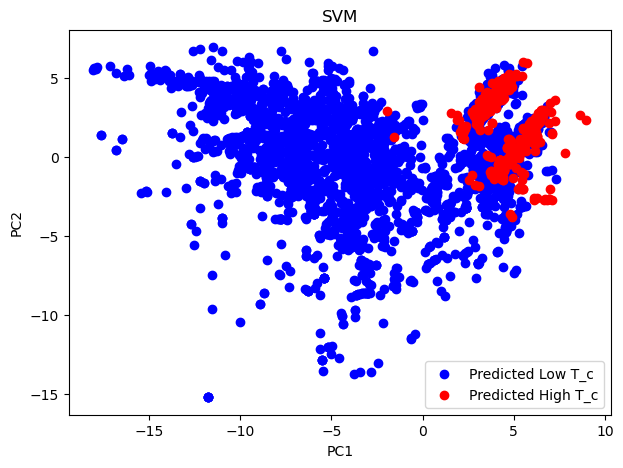

In [6]:
# Packages imported: pandas, numpy, matplotlib, scikit-learn, and xgboost. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, classification_report

# Import train.csv and create the binary classification target. Drop critical_temp column. 
train = pd.read_csv("train.csv")
train['high_Tc'] = (train['critical_temp'] >= 77).astype(int)
X_svm = train.drop(columns = ["critical_temp"])
y_svm = train["critical_temp"]

# Features prepared and labeled for classification. 
classification = train.drop(columns =["critical_temp", "high_Tc"])
y_classification = train["high_Tc"]

# Split into training and testing sets. 
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(classification, y_classification, test_size = 0.2, random_state = 40)

# Scaler was initialized and then fit onto training data before being transformed. 
scaler_c = StandardScaler()
X_train_scaled_c = scaler_c.fit_transform(X_train_c)
X_test_scaled_c = scaler_c.transform(X_test_c)

# SVM was intiialized with rbf kernel and trained on the scaled data. 
svm = SVC(kernel = 'rbf')
svm.fit(X_train_scaled_c, y_train_c)
svm_pred = svm.predict(X_test_scaled_c)

# Used to calculate how right SVM model was at predicting high T_c if actually was high T_c
precision = precision_score(y_test_c, svm_pred)
print("Precision for High T_c class:", round(precision, 2))

# PCA, reduced dimensionality to 2 components and transformed the dtaa and separated points by high T_c and low T_c. 
pca = PCA(n_components = 2)
pca_x_test = pca.fit_transform(X_test_scaled_c)
low_tc = pca_x_test[svm_pred == 0]
high_tc = pca_x_test[svm_pred == 1]

# 2D scatter plot. Low T_c in blue and high T_c in red. Legend created for visibility. 
plt.figure(figsize=(7, 5))
plt.scatter(low_tc[:, 0], low_tc[:, 1], color='blue', label="Predicted Low T_c")
plt.scatter(high_tc[:, 0], high_tc[:, 1], color='red', label="Predicted High T_c")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SVM")
plt.legend()